<a href="https://colab.research.google.com/github/NebojsaIvancevic/CNN-Dog-Breed-Classifier/blob/main/dogbreed_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resources


> [Deep learning with Python, TensorFlow and Keras](https://pythonprogramming.net/)


> [Dog breed classifier transfer learning](https://towardsdatascience.com/dog-breed-classification-hands-on-approach-b5e4f88c333e)

> [Best pre trained models](https://www.analyticsvidhya.com/blog/2020/08/top-4-pre-trained-models-for-image-classification-with-python-code/)

> [Basics of machine learning image techniques](https://iq.opengenus.org/basics-of-machine-learning-image-classification-techniques/)











Create a dog breed classifier using convolutional neural networks and a pretrained model

We are using the stanford dogs dataset from kaggle

We are using colab provided gpus so we need to install required libraries.

# **Neuronske mreže veštački neuron**
Matematički model biološkog neurona :
Bitno pojednostavljen u odnosu na biološki. Zadržani osnovni principi ponašanja biološkog neurona


*   Ulazni signali
*   Udruživanje ulaznih signala
*   Aktivacija
*   Izlazni signali

Namenjen izračunavanjima koristi se u mašinskom učenju.




# **Model sa jednim ulazom** 
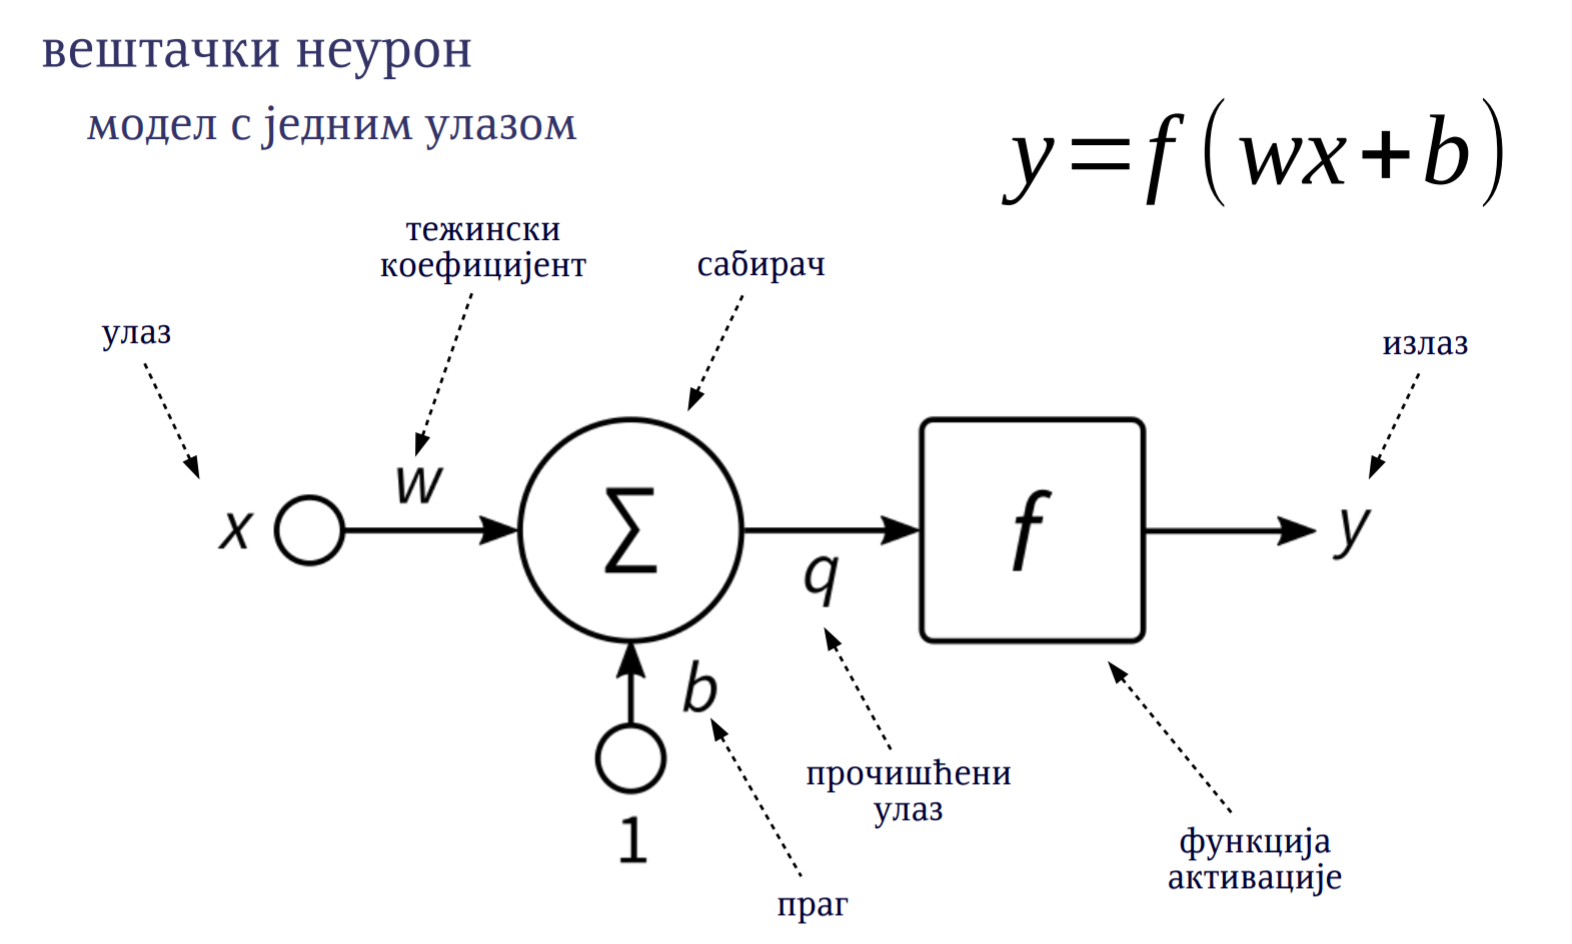

# **Model sa više ulaza**
Screenshot_6.png

# **Neuronska mreža**
Veštačka neuronska mreža (neuronska mreža)
Neuronska mreža kao skup povezanih veštačkih neurona dobija ulaz i daje izlaz
Osnovne arhitekture neuronskih mreža.
Neuronska mreža organizovana kroz slojeve sloj kao grupa neurona koji aktivni u paraleli i dele iste ulaze.
Vrste neuronskih mreža po broju slojeva i povezanosti slojeva


*   Jednoslojna
*   Višeslojna
*   Rekurentna



# **TRANSFER LEARNING :**
Transfer learning (TL) is a research problem in machine learning (ML) that focuses on storing knowledge gained while solving one problem and applying it to a different but related problem.
Transfer learning, used in machine learning, is the reuse of a pre-trained model on a new problem.
For example, in training a classifier to predict whether an image contains food, you could use the knowledge it gained during training to recognize drinks

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import tensorflow as tf
# tf.__version__
import matplotlib.pyplot as plt
import seaborn as sns

import os
import gc

from sklearn.model_selection import train_test_split

from tqdm.autonotebook import tqdm
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd 

from keras import Sequential
from keras.callbacks import EarlyStopping

from tensorflow.keras.optimizers import Adam, SGD
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from keras.layers import Lambda, Input, GlobalAveragePooling2D,BatchNormalization

from tensorflow.keras.models import Model

from keras.preprocessing.image import load_img

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  # This is added back by InteractiveShellApp.init_path()


In [5]:
# Check for GPU
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [6]:
#reading labels csv file

labels = pd.read_csv('/content/drive/MyDrive/Datasets/dataset#6dogbreedclassification/labels.csv')
labels.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [7]:
#describe
labels.describe()

id               breed
count                              10222               10222
unique                             10222                 120
top     d21c01d3de8cc6d3c6dd3efaba226412  scottish_deerhound
freq                                   1                 126

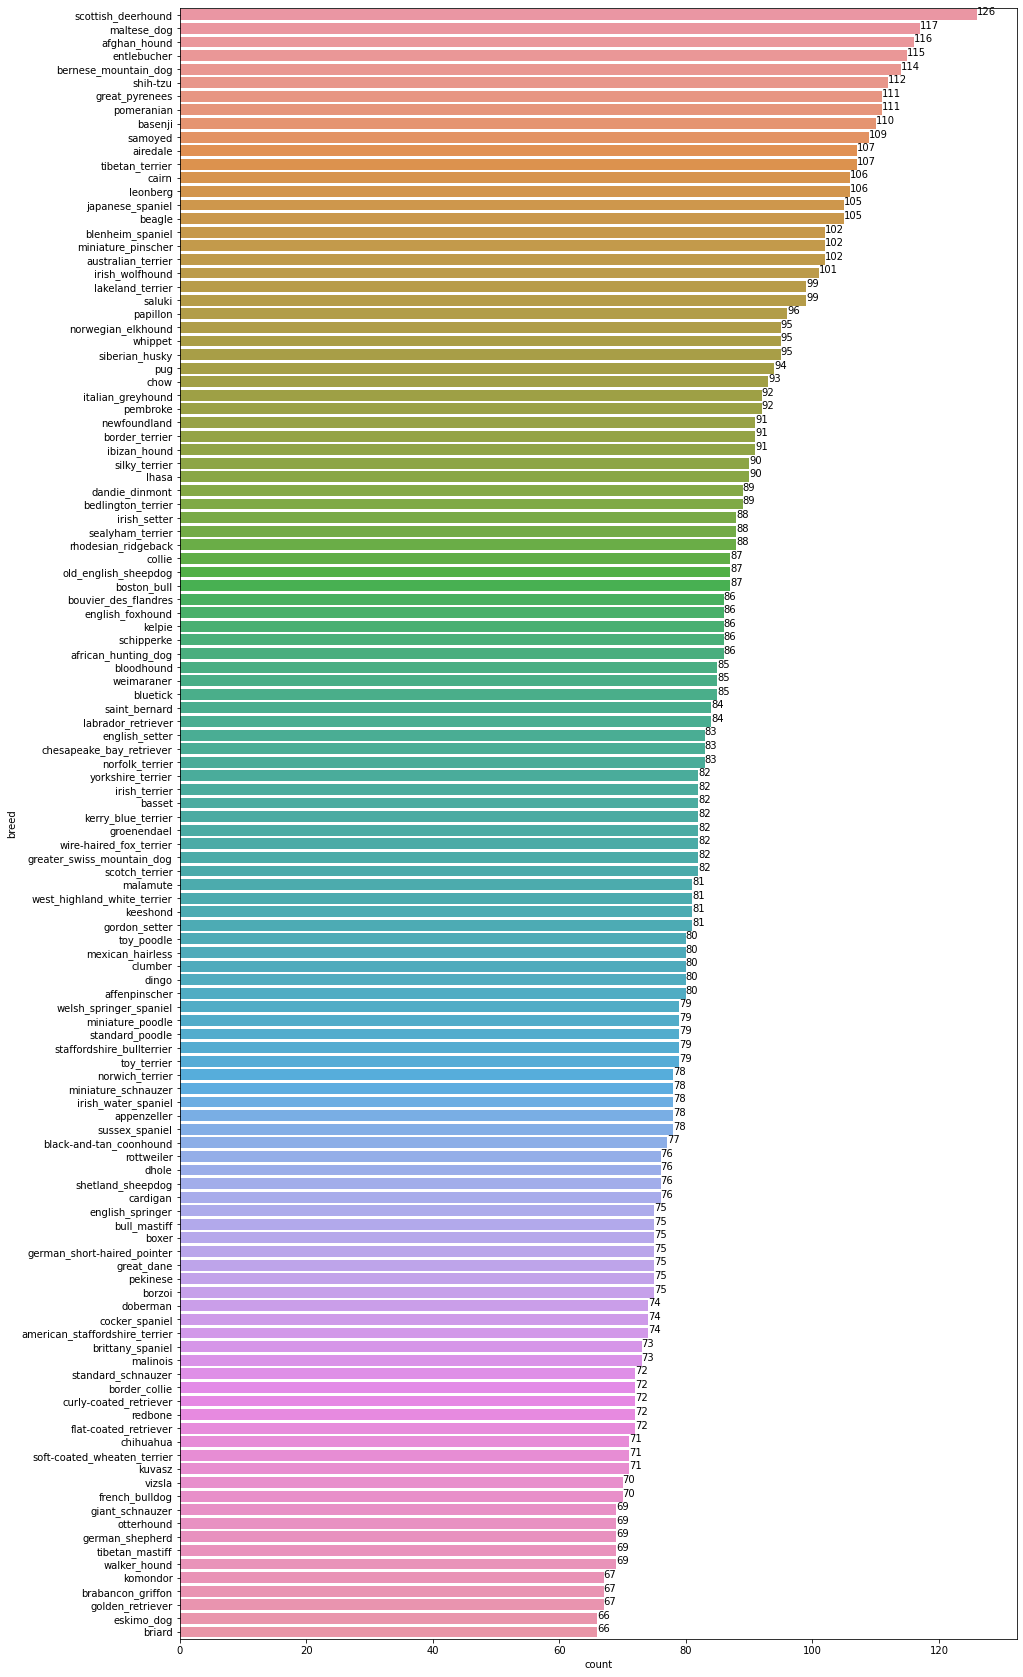

In [8]:
#function to show bar length
def barw(ax): 
    
    for p in ax.patches:
        val = p.get_width() #height of the bar
        x = p.get_x()+ p.get_width() # x- position 
        y = p.get_y() + p.get_height()/2 #y-position
        ax.annotate(round(val,2),(x,y))
        

# Finding the top dog breeds
plt.figure(figsize = (15,30))
ax0 =sns.countplot(y=labels['breed'],order=labels['breed'].value_counts().index)
barw(ax0)
plt.show()

In [9]:
# Show the unique dog breeds number
labels['breed'].nunique()

120

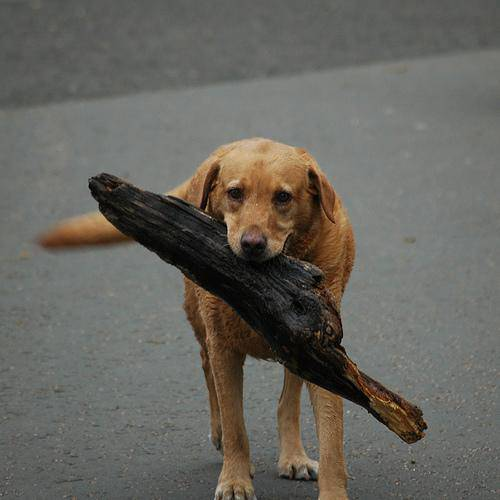

In [10]:
# Check out one dog image
from IPython.display import display, Image
Image("/content/drive/MyDrive/Datasets/dataset#6dogbreedclassification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg")

In [11]:
# Check if the number of images in train folder matches the number of labels
if len(os.listdir('/content/drive/MyDrive/Datasets/dataset#6dogbreedclassification/train')) == len(labels['id']):
    print('Number of file matches number of actual images!')
else:
    print('Number of file doesnot matches number of actual images!!')
# Here it doesn't match since there are 10222 labels while there are 10 more images in folder

Number of file doesnot matches number of actual images!!


In [12]:
#Create list of alphabetically sorted labels.
classes = sorted(list(set(labels['breed'])))
n_classes = len(classes)
print('Total unique breed {}'.format(n_classes))


#Map each label string to an integer label.
class_to_num = dict(zip(classes, range(n_classes)))
class_to_num

Total unique breed 120


{'affenpinscher': 0,
 'afghan_hound': 1,
 'african_hunting_dog': 2,
 'airedale': 3,
 'american_staffordshire_terrier': 4,
 'appenzeller': 5,
 'australian_terrier': 6,
 'basenji': 7,
 'basset': 8,
 'beagle': 9,
 'bedlington_terrier': 10,
 'bernese_mountain_dog': 11,
 'black-and-tan_coonhound': 12,
 'blenheim_spaniel': 13,
 'bloodhound': 14,
 'bluetick': 15,
 'border_collie': 16,
 'border_terrier': 17,
 'borzoi': 18,
 'boston_bull': 19,
 'bouvier_des_flandres': 20,
 'boxer': 21,
 'brabancon_griffon': 22,
 'briard': 23,
 'brittany_spaniel': 24,
 'bull_mastiff': 25,
 'cairn': 26,
 'cardigan': 27,
 'chesapeake_bay_retriever': 28,
 'chihuahua': 29,
 'chow': 30,
 'clumber': 31,
 'cocker_spaniel': 32,
 'collie': 33,
 'curly-coated_retriever': 34,
 'dandie_dinmont': 35,
 'dhole': 36,
 'dingo': 37,
 'doberman': 38,
 'english_foxhound': 39,
 'english_setter': 40,
 'english_springer': 41,
 'entlebucher': 42,
 'eskimo_dog': 43,
 'flat-coated_retriever': 44,
 'french_bulldog': 45,
 'german_shepherd'

In [13]:
input_shape = (331,331,3)


def images_to_array(directory, label_dataframe, target_size = input_shape):
    
    image_labels = label_dataframe['breed']
    images = np.zeros([len(label_dataframe), target_size[0], target_size[1], target_size[2]],dtype=np.uint8) #as we have huge data and limited ram memory. uint8 takes less memory
    y = np.zeros([len(label_dataframe),1],dtype = np.uint8)
    
    for ix, image_name in enumerate(tqdm(label_dataframe['id'].values)):
        img_dir = os.path.join(directory, image_name + '.jpg')
        img = load_img(img_dir, target_size = target_size)
#         img = np.expand_dims(img, axis=0)
#         img = processed_image_resnet(img)
#         img = img/255
        images[ix]=img
#         images[ix] = img_to_array(img)
        del img
        
        dog_breed = image_labels[ix]
        y[ix] = class_to_num[dog_breed]
    
    y = to_categorical(y)
    
    return images,y

In [15]:
import time 
t = time.time()

X,y = images_to_array('/content/drive/MyDrive/Datasets/dataset#6dogbreedclassification/train', labels[:])

print('runtime in seconds: {}'.format(time.time() - t))

  0%|          | 0/10222 [00:00<?, ?it/s]

runtime in seconds: 63.52624154090881


In [16]:
# np.where(y[5]==1)[0][0]

# lets check some dogs and their breeds
n=25

# setup the figure 
plt.figure(figsize=(20,20))

for i in range(n):
#     print(i)
    ax = plt.subplot(5, 5, i+1)
    plt.title(classes[np.where(y[i] ==1)[0][0]])
    plt.imshow(X[i].astype('int32')) # .astype('int32') ---> as imshow() needs integer data to read the image

In [17]:
#Learning Rate Annealer
lrr= ReduceLROnPlateau(monitor='val_accuracy', factor=.01, patience=3, min_lr=1e-5,verbose = 1)

#Prepare call backs
EarlyStop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [18]:
# Hyperparameters
batch_size= 128
epochs=50
learn_rate=.001
sgd=SGD(learning_rate=learn_rate,momentum=.9,nesterov=False)
adam=Adam(learning_rate=learn_rate, beta_1=0.9, beta_2=0.999, epsilon=None,  amsgrad=False)

# **Konvolucijske neuronske mreže**

*   Popularne u oblasti računarske vizije
*   Naziv dobile po knovolucionom sloju. Sloj neuronske mreže koji izvršava operaciju konvolucije.
Početni slojevi neuronske mreže
namenjeni prepoznavanju lokalnih šablona slike
opštiji šabloni
najčešće praćeni slojevima tipa max pooling

* Prima i vraća 4D tenzore (veličina batch-a, visina, širina, broj kanala)

* Nastavak mreže je najčešće klasična neuronska mreža namenjena prepoznavanju globalnih šablona specijalizacija za kontekst problema koji se rešava. 







# **Konvolucija :**
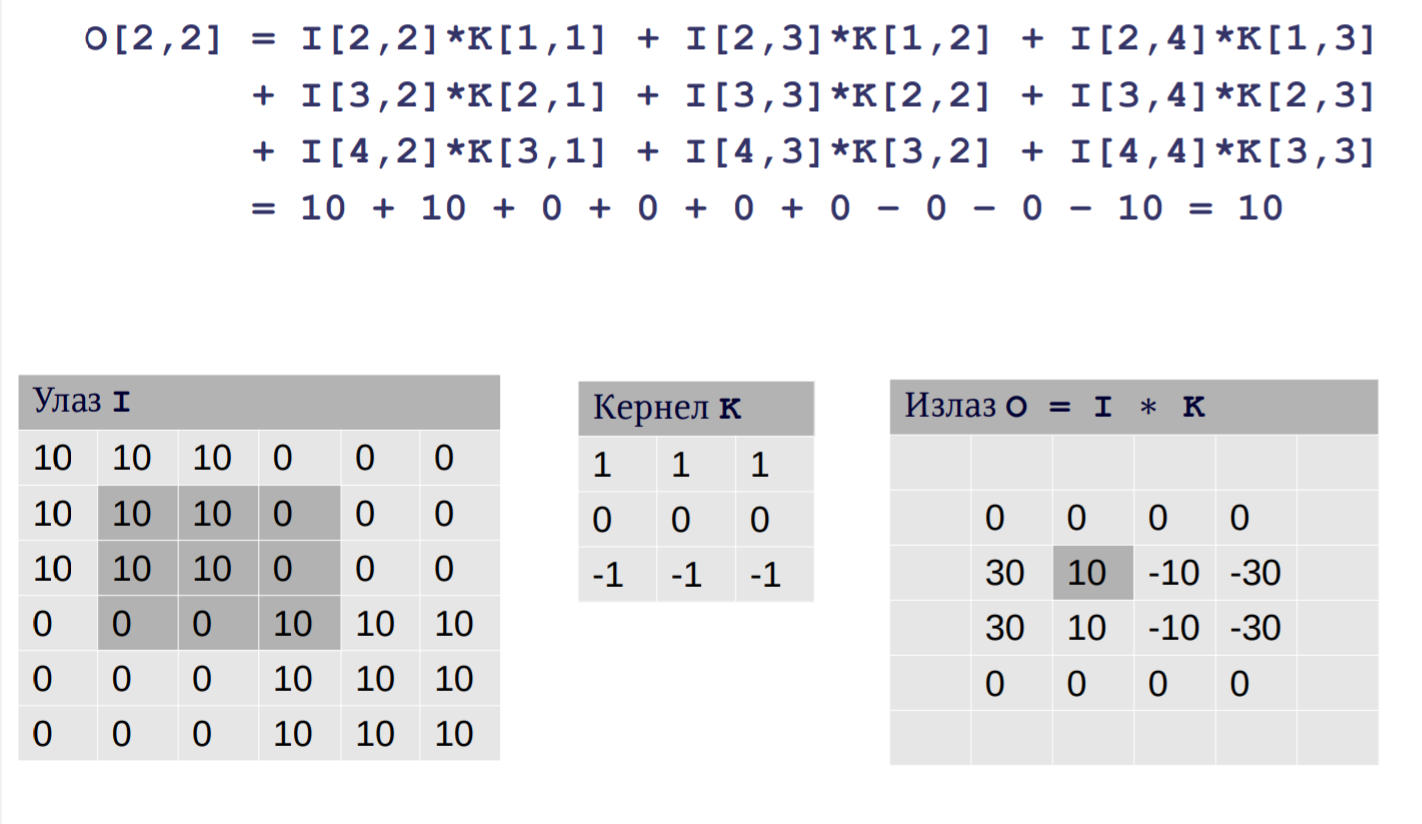

# **Pooling :**
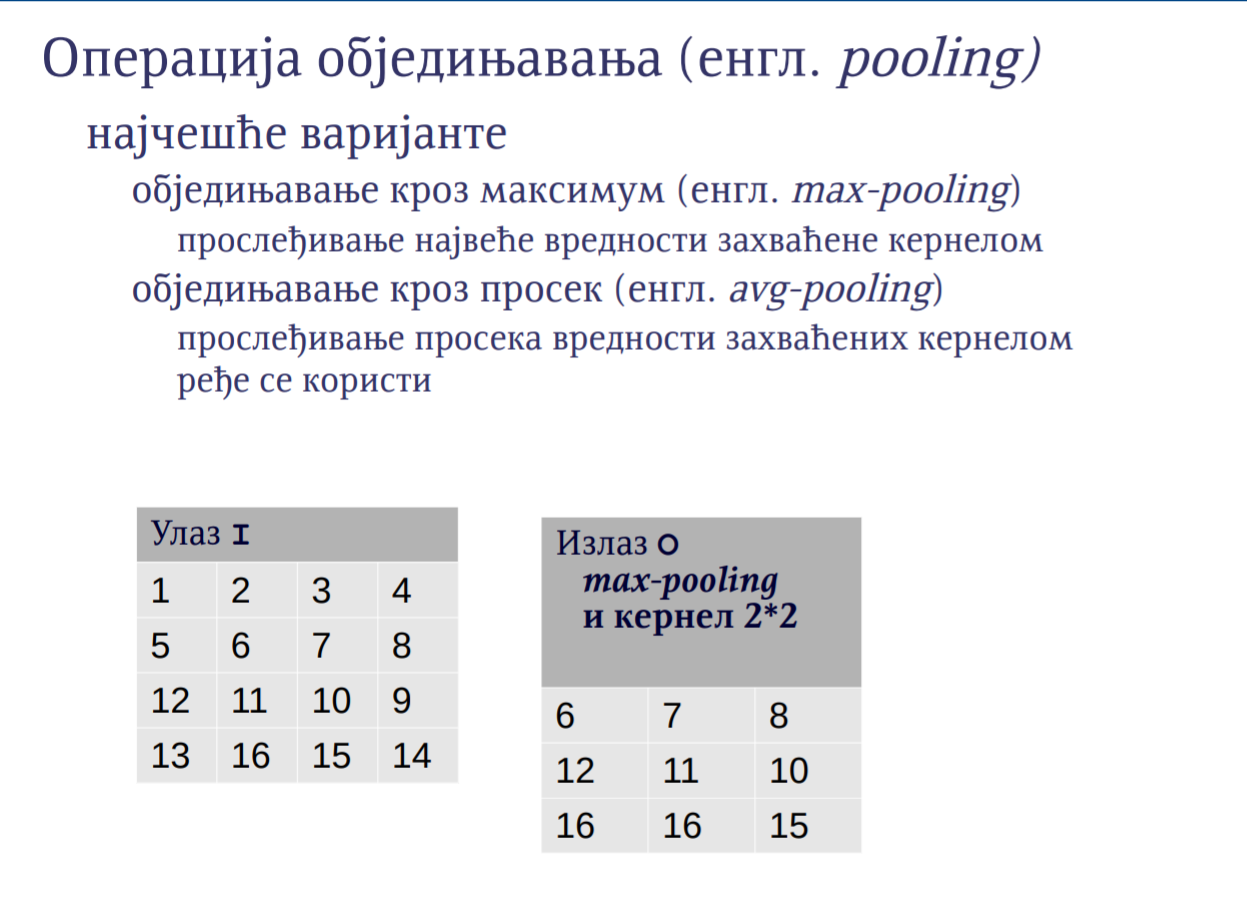

# **Primer mreže MNIST dataset :**
Screenshot_4.png

**Model Building**: 
*   The basic idea here is to extract features from the data set from pretrained models and create a simple deep net by using all those features combined.
*  So we will GlobalAveragePooling2D to extract a pooled output from our selected models
* img_size = You can change this shape according to the documentation of the pretrained model
* Keras documentation for all models: https://keras.io/api/applications/

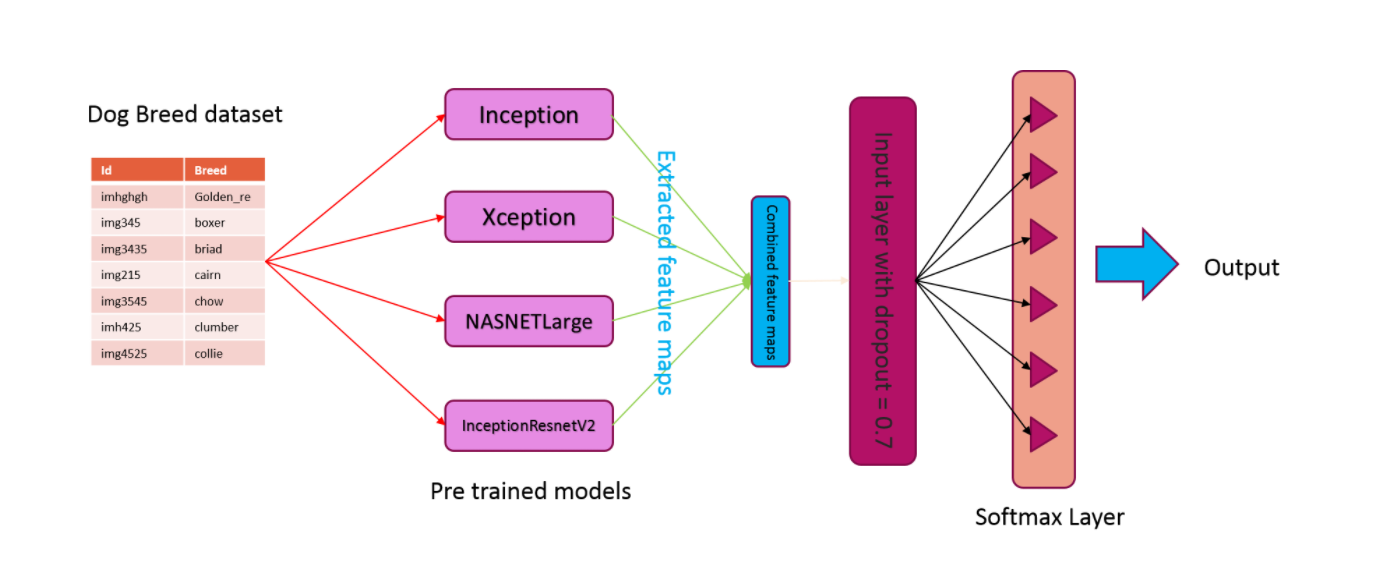

In [19]:
#function to extract features from the dataset by a given pretrained model
img_size = (331,331,3)

def get_features(model_name, model_preprocessor, input_size, data):

    input_layer = Input(input_size)
    preprocessor = Lambda(model_preprocessor)(input_layer)
    base_model = model_name(weights='imagenet', include_top=False,
                            input_shape=input_size)(preprocessor)
    avg = GlobalAveragePooling2D()(base_model)
    feature_extractor = Model(inputs = input_layer, outputs = avg)
    
    #Extract feature.
    feature_maps = feature_extractor.predict(data, verbose=1)
    print('Feature maps shape: ', feature_maps.shape)
    return feature_maps

In [20]:
# Extract features using InceptionV3 
from keras.applications.inception_v3 import InceptionV3, preprocess_input
inception_preprocessor = preprocess_input
inception_features = get_features(InceptionV3,
                                  inception_preprocessor,
                                  img_size, X)

320/320 [==============================] - 139s 331ms/step
Feature maps shape:  (10222, 2048)


In [21]:
# Extract features using Xception 
from keras.applications.xception import Xception, preprocess_input
xception_preprocessor = preprocess_input
xception_features = get_features(Xception,
                                 xception_preprocessor,
                                 img_size, X)

320/320 [==============================] - 202s 621ms/step
Feature maps shape:  (10222, 2048)


In [22]:
# Extract features using InceptionResNetV2 
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
inc_resnet_preprocessor = preprocess_input
inc_resnet_features = get_features(InceptionResNetV2,
                                   inc_resnet_preprocessor,
                                   img_size, X)

320/320 [==============================] - 283s 868ms/step
Feature maps shape:  (10222, 1536)


In [23]:
# Extract features using NASNetLarge 
from keras.applications.nasnet import NASNetLarge, preprocess_input
nasnet_preprocessor = preprocess_input
nasnet_features = get_features(NASNetLarge,
                               nasnet_preprocessor,
                               img_size, X)

320/320 [==============================] - 671s 2s/step
Feature maps shape:  (10222, 4032)


In [24]:
del X #to free up some ram memory
gc.collect()

102577

In [25]:
#Creating final featuremap by combining all extracted features

final_features = np.concatenate([inception_features,
                                 xception_features,
                                 nasnet_features,
                                 inc_resnet_features,], axis=-1) #axis=-1 to concatinate horizontally

print('Final feature maps shape', final_features.shape)

Final feature maps shape (10222, 9664)


In [26]:
#Prepare Deep net

model = Sequential()
# model.add(Dense(1028,input_shape=(final_features.shape[1],)))
model.add(Dropout(0.7,input_shape=(final_features.shape[1],)))
model.add(Dense(n_classes,activation= 'softmax'))

model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#Training the model. 
history = model.fit(final_features, y,
            batch_size=batch_size,
            epochs=epochs,
            validation_split=0.2,
            callbacks=[lrr,EarlyStop])

Epoch 1/50
64/64 [==============================] - 2s 13ms/step - loss: 0.9930 - accuracy: 0.8005 - val_loss: 0.1911 - val_accuracy: 0.9413
Epoch 2/50
64/64 [==============================] - 1s 9ms/step - loss: 0.1727 - accuracy: 0.9451 - val_loss: 0.1858 - val_accuracy: 0.9423
Epoch 3/50
64/64 [==============================] - 1s 9ms/step - loss: 0.1370 - accuracy: 0.9583 - val_loss: 0.1854 - val_accuracy: 0.9428
Epoch 4/50
64/64 [==============================] - 1s 8ms/step - loss: 0.1114 - accuracy: 0.9638 - val_loss: 0.1836 - val_accuracy: 0.9374
Epoch 5/50
64/64 [==============================] - 1s 8ms/step - loss: 0.0922 - accuracy: 0.9695 - val_loss: 0.1928 - val_accuracy: 0.9384
Epoch 6/50
64/64 [==============================] - 1s 8ms/step - loss: 0.0802 - accuracy: 0.9736 - val_loss: 0.1838 - val_accuracy: 0.9447
Epoch 7/50
64/64 [==============================] - 1s 9ms/step - loss: 0.0671 - accuracy: 0.9793 - val_loss: 0.1839 - val_accuracy: 0.9408
Epoch 8/50
64/64 [=

In [27]:
#deleting to free up ram memory

del inception_features
del xception_features
del nasnet_features
del inc_resnet_features
del final_features
gc.collect()

1767

In [28]:
#Function to read images from test directory

def images_to_array_test(test_path, img_size = (331,331,3)):
    test_filenames = [test_path + fname for fname in os.listdir(test_path)]

    data_size = len(test_filenames)
    images = np.zeros([data_size, img_size[0], img_size[1], 3], dtype=np.uint8)
    
    
    for ix,img_dir in enumerate(tqdm(test_filenames)):
#         img_dir = os.path.join(directory, image_name + '.jpg')
        img = load_img(img_dir, target_size = img_size)
#         img = np.expand_dims(img, axis=0)
#         img = processed_image_resnet(img)
#         img = img/255
        images[ix]=img
#         images[ix] = img_to_array(img)
        del img
    print('Ouptut Data Size: ', images.shape)
    return images

test_data = images_to_array_test('/content/drive/MyDrive/Datasets/dataset#6dogbreedclassification/test/', img_size)

  0%|          | 0/10357 [00:00<?, ?it/s]

Ouptut Data Size:  (10357, 331, 331, 3)


In [29]:
#Extract test data features.
def extact_features(data):
    inception_features = get_features(InceptionV3, inception_preprocessor, img_size, data)
    xception_features = get_features(Xception, xception_preprocessor, img_size, data)
    nasnet_features = get_features(NASNetLarge, nasnet_preprocessor, img_size, data)
    inc_resnet_features = get_features(InceptionResNetV2, inc_resnet_preprocessor, img_size, data)

    final_features = np.concatenate([inception_features,
                                     xception_features,
                                     nasnet_features,
                                     inc_resnet_features],axis=-1)
    
    print('Final feature maps shape', final_features.shape)
    
    #deleting to free up ram memory
    del inception_features
    del xception_features
    del nasnet_features
    del inc_resnet_features
    gc.collect()
    
    
    return final_features

test_features = extact_features(test_data)

324/324 [==============================] - 109s 332ms/step
Feature maps shape:  (10357, 2048)
324/324 [==============================] - 200s 618ms/step
Feature maps shape:  (10357, 2048)
324/324 [==============================] - 673s 2s/step
Feature maps shape:  (10357, 4032)
324/324 [==============================] - 281s 858ms/step
Feature maps shape:  (10357, 1536)
Final feature maps shape (10357, 9664)


In [30]:
#Free up some space.
del test_data
gc.collect()

340

In [31]:
#Predict test labels given test data features.

pred = model.predict(test_features)

In [32]:
# First prediction
print(pred[0])
print(f"Max value (probability of prediction): {np.max(pred[0])}") # the max probability value predicted by the model
print(f"Sum: {np.sum(pred[0])}") # because we used softmax activation in our model, this will be close to 1
print(f"Max index: {np.argmax(pred[0])}") # the index of where the max value in predictions[0] occurs
print(f"Predicted label: {classes[np.argmax(pred[0])]}")

[7.64800552e-06 1.39513622e-05 3.52276875e-05 9.89657906e-07
 1.66243535e-06 1.71624083e-06 2.33046066e-07 1.25589759e-05
 1.79596873e-06 2.50395601e-07 1.05145170e-06 8.15890587e-07
 7.63447588e-07 2.48046808e-06 1.90589089e-05 3.72432646e-06
 2.19683125e-06 6.69152450e-06 9.35648018e-07 3.94032986e-06
 4.97732344e-07 3.21642983e-06 1.24104394e-04 2.83947202e-06
 4.40320918e-07 7.28799887e-06 1.82051208e-05 6.91996729e-06
 1.33701569e-05 4.36663368e-06 3.28215407e-07 7.12903386e-07
 1.82335796e-07 3.19670562e-06 7.88750128e-07 3.09800180e-06
 1.02586113e-03 7.21722492e-04 2.45141200e-05 1.22670635e-05
 3.14028580e-06 5.76877085e-07 7.95154378e-08 2.29626403e-06
 2.38137527e-05 3.80610544e-07 1.68794519e-04 3.87419050e-06
 7.40577889e-07 2.04586240e-06 5.23447852e-07 1.87047517e-05
 1.35388859e-07 3.62109881e-06 1.55890048e-05 5.02716983e-04
 4.13667112e-06 5.22409573e-05 3.73139613e-07 8.40799203e-06
 8.88907161e-05 2.82021142e-06 1.39139786e-06 3.33037227e-03
 9.89305022e-07 2.777343

In [33]:
# Create pandas DataFrame with empty columns
preds_df = pd.DataFrame(columns=["id"] + list(classes))
preds_df.head()

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [34]:
# Append test image ID's to predictions DataFrame
test_path = "/content/drive/MyDrive/Datasets/dataset#6dogbreedclassification/test/"
preds_df["id"] = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df.head()

id  ... yorkshire_terrier
0  e757a7450559dc61a9261fe978e23b04  ...               NaN
1  e5b14b20ee8ac070bf5cea3b640f3dde  ...               NaN
2  e59d59ffbb65d9eae166d4068af5d9b9  ...               NaN
3  e7b4b0e7d7d76f8dbd64920f34443b25  ...               NaN
4  e05367db91d0449b2afe76a1b7acc1c8  ...               NaN

[5 rows x 121 columns]

In [35]:
preds_df.loc[:,list(classes)]= pred

preds_df.to_csv('submission.csv',index=None)
preds_df.head()

id  ... yorkshire_terrier
0  e757a7450559dc61a9261fe978e23b04  ...        1.0618e-06
1  e5b14b20ee8ac070bf5cea3b640f3dde  ...       1.66384e-05
2  e59d59ffbb65d9eae166d4068af5d9b9  ...       2.82832e-05
3  e7b4b0e7d7d76f8dbd64920f34443b25  ...       3.48468e-06
4  e05367db91d0449b2afe76a1b7acc1c8  ...       2.32343e-06

[5 rows x 121 columns]

# **Predicting with custom input**

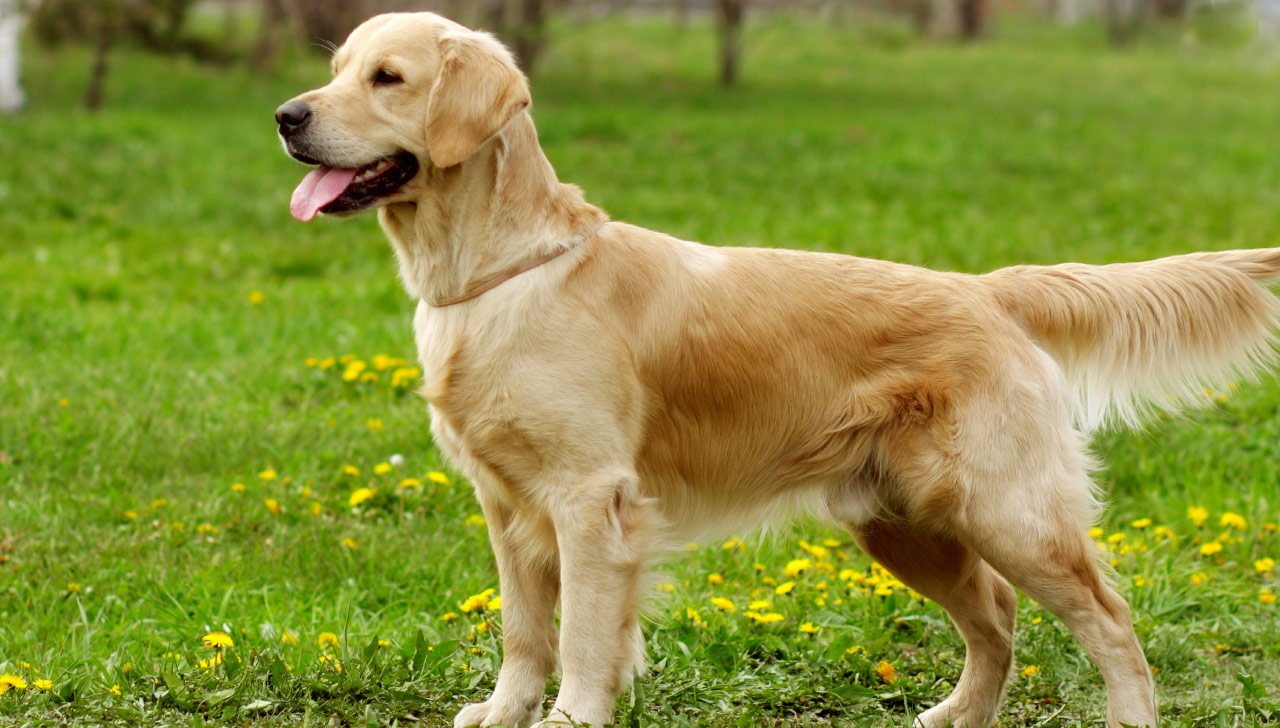

In [37]:
#Custom input

Image('/content/drive/MyDrive/Datasets/dataset#6dogbreedclassification/custom/DBS_GoldRetriever_1280.jpg')

In [38]:
#reading the image and converting it into an np array

img_g = load_img('/content/drive/MyDrive/Datasets/dataset#6dogbreedclassification/custom/DBS_GoldRetriever_1280.jpg',target_size = img_size)
img_g = np.expand_dims(img_g, axis=0) # as we trained our model in (row, img_height, img_width, img_rgb) format, np.expand_dims convert the image into this format
# img_g

In [39]:
img_g.shape

(1, 331, 331, 3)

In [40]:
# #Predict test labels given test data features.
test_features = extact_features(img_g)
predg = model.predict(test_features)
print(f"Predicted label: {classes[np.argmax(predg[0])]}")
print(f"Probability of prediction): {round(np.max(predg[0])) * 100} %")

1/1 [==============================] - 3s 3s/step
Feature maps shape:  (1, 2048)
1/1 [==============================] - 1s 1s/step
Feature maps shape:  (1, 2048)
1/1 [==============================] - 8s 8s/step
Feature maps shape:  (1, 4032)
1/1 [==============================] - 5s 5s/step
Feature maps shape:  (1, 1536)
Final feature maps shape (1, 9664)
Predicted label: golden_retriever
Probability of prediction): 100 %


# **Zaključak**
Problem klasifikacije rase psa nad ovim datasetom je specifičan u tome što po klasi tj rasi psa nema dovoljno slika kako bi se napravila predikcija velike verovatnoće, samim tim smo koristili tehniku transfer learninga gde sa smo koristili već postojeće i iztrenirane modele na ovome sličnim problemima i spojili ih zajedno kako bi dobili što bolju predikciju. Većina ovakvih problema se oslanja na primenu neuronskih i konvolucionih neuronskih mreža što smo i mi primenili u samom problemu. Koristili smo dataset stanford dogs gde je bilo potrebno uporediti da li se nalazi adekvatan broj slika u trening folderu kao što je navedeno u csv fajlu zatim ih mapirati u intigere kako bi mogli koristi za predikciju. Od već iztreniranih modela koristeni su inception XceptionNASNetLarge InceptionRes skojima smo dobili veliku preciznost val_accuracy i manju vrednost na loss funkciji.